In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = pd.read_csv("Iris.csv")
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


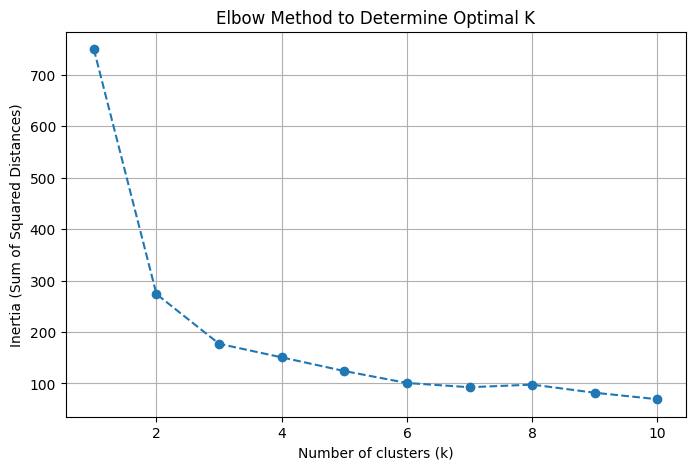

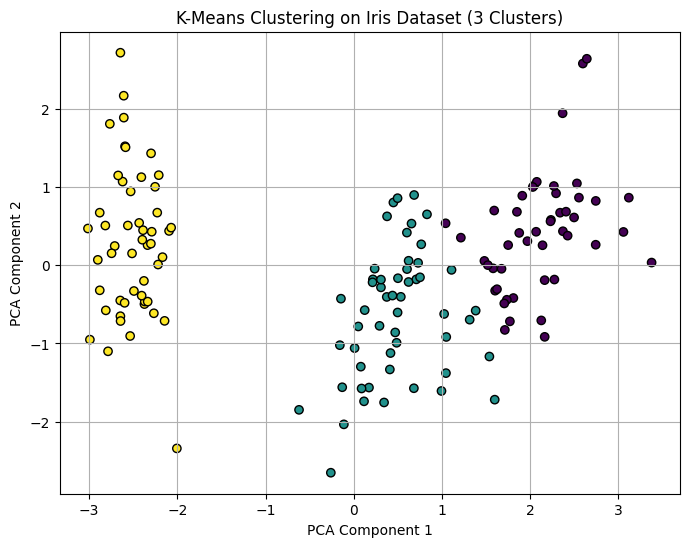

In [5]:
# Step 2: Data Preprocessing
# Drop the 'Species' column as it's the target we are clustering without labels
X = data.drop(columns=['Species'])

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Use the Elbow Method to determine the optimal number of clusters
# Create a list to hold the sum of squared distances (inertia) for different k values
inertia = []

# Test K-Means for different numbers of clusters (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 5: Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Step 6: Apply K-Means Clustering with the optimal number of clusters
# Based on the elbow method, let's say the elbow is at 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster predictions to the original dataframe for visualization purposes
data['Cluster'] = y_kmeans

# Step 7: Visualize the Clusters
# Since Iris has 4 features, we'll use the first two principal components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering on Iris Dataset (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()